## Data aggregation
This script does the data aggregation.

Inputs: data in json format

Output: Aggregated data in json

## Import the data

In [3]:
import json
import numpy as np
import datetime

## Data info
* sensorType
* valueLength
* values
* timestamp
* sensorLocation

## Data pre processing

In [4]:
allData = []
for line in open('./data/trailer-D.json', 'r'):
    parsed_json = json.loads(line)
    allData.append(parsed_json)

In [5]:
sensors = set()
for data in allData:
    aa = data['sensorType']
    sensors.update(set([aa]))
    # print(aa)
print(sensors)

{'GYROSCOPE', 'LIGHT', 'TEMPERATURE', 'MAGNETOMETER', 'ACCELEROMETER', 'BAROMETER'}


In [4]:
class SensorDataALL(object):
    sensor = ""
    # The class "constructor" - It's actually an initializer 
    def __init__(self, sensor):
        self.sensor = sensor

class SensorDataInfo(object):
    valueLength = None
    values = 0
    # dt = datetime.datetime(2012, 5, 1)
    timestamp = datetime.datetime.now()
    sensorLocation = ""
    
    # The class "constructor" - It's actually an initializer 
    def __init__(self, valueLength, values, timestamp, sensorLocation):
        self.valueLength = valueLength
        self.values = values
        self.timestamp = timestamp
        self.sensorLocation = sensorLocation
        
    def getvalues(self):
        return self.values

    def getvalueLength(self):
        return self.valueLength
    
    def gettimestamp(self):
        return self.timestamp
        
    def getsensorLocation(self):
        return self.sensorLocation

In [5]:
sensor_data = dict()
for sensor in sensors:
    sensor_data[sensor]=[]
    for data in allData:
        if data['sensorType'] ==sensor:
            timestamp1 =datetime.datetime.fromtimestamp(int(data['timestamp'])/ 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f')
            sensr_obj = SensorDataInfo(data['valueLength'],data['values'],timestamp1,data['sensorLocation'])
            sensor_data[sensor].append(sensr_obj)

In [6]:
for sens,data in sensor_data.items():
    print(sens)
    # print(data.gettimestamp())
    for dat in data:
        print(np.datetime64(dat.gettimestamp()))
        #time_stamp = datetime.datetime.fromtimestamp().strftime('%Y-%m-%d %H:%M:%S')
        # print(dat.getvalues()[0], dat.gettimestamp())

GYROSCOPE
2017-11-30T16:19:52.179000
2017-11-30T16:19:54.339000
2017-11-30T16:19:56.432000
2017-11-30T16:19:58.592000
2017-11-30T16:20:00.752000
2017-11-30T16:20:02.844000
2017-11-30T16:20:04.937000
2017-11-30T16:20:07.029000
2017-11-30T16:20:09.122000
2017-11-30T16:20:11.282000
2017-11-30T16:20:13.374000
2017-11-30T16:20:15.467000
2017-11-30T16:20:17.559000
2017-11-30T16:20:19.652000
2017-11-30T16:20:21.744000
2017-11-30T16:20:23.837000
2017-11-30T16:20:25.929000
2017-11-30T16:20:28.022000
2017-11-30T16:20:30.114000
2017-11-30T16:20:32.207000
2017-11-30T16:20:34.299000
2017-11-30T16:20:36.459000
2017-11-30T16:20:38.552000
2017-11-30T16:20:40.644000
2017-11-30T16:20:42.804000
2017-11-30T16:20:44.964000
2017-11-30T16:20:47.124000
2017-11-30T16:20:49.352000
2017-11-30T16:20:51.579000
2017-11-30T16:20:53.672000
2017-11-30T16:20:55.764000
2017-11-30T16:20:57.857000
2017-11-30T16:20:59.949000
2017-11-30T16:21:02.042000
2017-11-30T16:21:04.202000
2017-11-30T16:21:06.294000
2017-11-30T16:21:0

## Plotting the data

In [6]:
type(datetime.datetime.now())

datetime.datetime

191 191


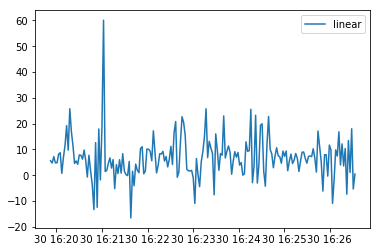

In [8]:
import matplotlib.pyplot as plt

time_stp = []
sens_val = []

## Generate the data list
for sens,data in sensor_data.items():
    if sens=="GYROSCOPE":
        for dat in data:
            sens_val.append(dat.getvalues()[0])
            time_stp.append(dat.gettimestamp())

x = [datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S.%f') for elem in time_stp]
            
print(len(x),len(sens_val))
# Plot the data
plt.plot(x,sens_val, label='linear')
# Add a legend
plt.legend()
# Show the plot
plt.show()

190 191 190


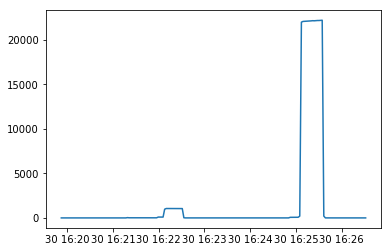

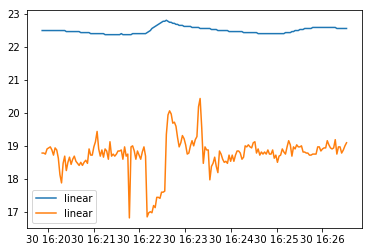

In [9]:
import matplotlib.pyplot as plt

time_stp = []
sens_val = []

## Generate the data list
for sens,data in sensor_data.items():
    if sens=="LIGHT":
        for dat in data:
            sens_val.append(dat.getvalues())
            time_stp.append(dat.gettimestamp())

            
## Generate the data list
sens_val1 = []
sens_val2 = []
for sens,data in sensor_data.items():
    if sens=="TEMPERATURE":
        for dat in data:
            sens_val1.append(dat.getvalues()[0])
            sens_val2.append(dat.getvalues()[1])
            
            
timeStampfinal = [datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S.%f') for elem in time_stp]

print(len(sens_val),len(sens_val1),len(timeStampfinal))

# Plot the data
plt.figure(1)
plt.plot(timeStampfinal[:190],sens_val[:190], label='linear')

plt.figure(2)
plt.plot(timeStampfinal[:190],sens_val1[:190], label='linear')
plt.plot(timeStampfinal[:190],sens_val2[:190], label='linear')
# Add a legend
plt.legend()
# Show the plot
plt.show()

## Compute Veclocity

In [10]:
## Get difference in time 
# np.diff(index)/np.timedelta64(1, 's')

In [11]:
## Define vel matrix
vel_x = []
vel_y = []
vel_z = []

acc_x = []
acc_y = []
acc_z = []
time_stp = []
vel_abs = []

## Get accelerometer data
for sens,data in sensor_data.items():
    if sens=="ACCELEROMETER":
        for dat in data:
            acc_x.append(dat.getvalues()[0])
            acc_y.append(dat.getvalues()[0])
            acc_z.append(dat.getvalues()[0])
            time_stp.append(np.datetime64(dat.gettimestamp()))

try:
    assert len(acc_x) == len(acc_y) 
    assert len(acc_z) == len(time_stp)
    
    time_diff = np.diff(time_stp)/np.timedelta64(1, 's')

    vel_x.append(0)
    vel_y.append(0)
    vel_z.append(0)
    vel_abs.append(0)
    
    ## Generate velocities
    for i in range(len(acc_x)):
        # Integrate over the acceleration data:
        vx = (acc_x[i+1]-acc_x[i])*(time_diff[i]) + vel_x[i]
        vy = (acc_y[i+1]-acc_y[i])*(time_diff[i]) + vel_y[i]
        vz = (acc_z[i+1]-acc_z[i])*(time_diff[i]) + vel_z[i]
        vel_x.append(vx)
        vel_y.append(vy)
        vel_z.append(vz) 
        vel_abs.append(np.sqrt(vx**2+vy**2+vz**2))
        
except:
    pass

In [12]:
vel_abs

[0,
 0.4475592223464111,
 0.074066315221904128,
 0.02098843012277193,
 0.043599812149706256,
 0.29748902920722192,
 0.15831392616984227,
 0.16804487177134983,
 0.068918792155366934,
 0.025076256088779728,
 0.011193632062293939,
 0.11359902173997025,
 0.060673367668847143,
 0.63940456961903203,
 0.19001180911304599,
 0.32276995145588028,
 0.10957377964103258,
 0.1786080136593064,
 0.23610905585003295,
 0.12990254197576556,
 0.18768013720070875,
 0.083595554711299633,
 0.073859957606158474,
 0.32774917466367415,
 0.11981004768273698,
 0.063166573616461039,
 0.0084039984740290948,
 0.17893150459382548,
 0.030233927890517667,
 0.039183420881578751,
 0.015663727054191185,
 0.51182862518800354,
 0.21813099430613866,
 0.85359996898717183,
 0.3439304872130956,
 0.12315490165926772,
 0.26299347826038644,
 0.10022129728971436,
 0.2768118269639348,
 0.051230815292622973,
 0.60724957072783481,
 0.39379672048520492,
 0.46991138876176325,
 0.041749782295430179,
 0.53472501752848789,
 0.5435713317116

In [13]:
from web3 import Web3, HTTPProvider, IPCProvider

In [14]:
web3 = Web3(HTTPProvider('http://localhost:8545'))

In [15]:
web3.eth.blockNumber

320